In [1]:
############################## Read Data ####################################

# Pandas is used for data manipulation
import pandas as pd
# upload data


### combined 240
features = pd.read_excel('Alldata236_AE.xlsx', sheet_name='4tempercolumn')



In [2]:
features

,alloy name,temper_type,Type,digit1,digit2,digit3,Si,Fe,Cu,Mn,...,Endu,RGC,RSCC,Extr,CW,Mach,RSW,Braz,GW,AW
0,7040,T74511,T,7,4,511,0.00,0.0,1.90,0.00,...,150.0,Fair,Very Good,Fair,Borderline,Very Good,Very Good,Borderline,Borderline,Borderline
1,7050,T7351X,T,7,3,510,0.00,0.0,2.30,0.00,...,150.0,Fair,Very Good,Fair,Borderline,Very Good,Very Good,Borderline,Borderline,Borderline
2,5383,H116,H,1,1,60,0.00,0.0,0.00,0.85,...,160.0,Excellent,Very Good,Fair,Fair,Borderline,Excellent,Borderline,Fair,Excellent
3,5059,H116,H,1,1,60,0.00,0.0,0.00,0.90,...,170.0,Excellent,Very Good,Very Good,Fair,Borderline,Excellent,Borderline,Fair,Excellent
4,5086,H116,H,1,1,60,0.00,0.0,0.00,0.45,...,125.0,Excellent,Excellent,Very Good,Very Good,Borderline,Excellent,Borderline,Fair,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,6111,T41,T,4,1,0,0.85,0.0,0.70,0.28,...,55.0,Excellent,Excellent,Excellent,Fair,Fair,Excellent,Excellent,Excellent,Excellent
232,2008,T4,T,4,0,0,0.65,0.0,0.90,0.00,...,105.0,Fair,Fair,Very Good,Fair,Very Good,Very Good,Borderline,Borderline,Very Good
233,5056,O,O,0,0,0,0.00,0.0,0.00,0.12,...,140.0,Excellent,Very Good,Fair,Excellent,Borderline,Very Good,Borderline,Fair,Excellent
234,3003,O,O,0,0,0,0.00,0.0,0.12,1.20,...,50.0,Excellent,Excellent,Excellent,Excellent,Unacceptable,Very Good,Excellent,Excellent,Excellent


In [3]:

################ for Technological only

import numpy as np

features = features.replace('Borderline [3]', 'Borderline')
features = features.replace('Fair [3]', 'Fair')
features = features.replace('Excellent [3]', 'Excellent')
features = features.replace('Very Good [3]', 'Very Good')
features = features.replace('Unacceptable or Not Commericially Practical', 'Unacceptable')

#### categorical labels to 1-2-3-4
features = features.replace('Unacceptable', 1)
features = features.replace('Borderline', 2)
features = features.replace('Fair', 3)
features = features.replace('Very Good', 4)
features = features.replace('Excellent', 5)




In [4]:
features = features.drop(labels='alloy name', axis=1)

features = features.drop(labels='temper_type', axis=1)
features = pd.get_dummies(features)

## correcting order of tempers
cols = list(features.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Type_H')) #Remove b from list
cols.pop(cols.index('Type_O')) #Remove x from list
cols.pop(cols.index('Type_T')) #Remove x from list
features = features[['Type_H', 'Type_O','Type_T']+cols]

In [5]:
# cols = list(features.columns.values) #Make a list of all of the columns in the df
# cols.pop(cols.index('temper_H')) #Remove b from list
# cols.pop(cols.index('temper_O')) #Remove x from list
# cols.pop(cols.index('temper_T')) #Remove x from list
# features = features[['temper_H', 'temper_O','temper_T']+cols]

In [6]:
# features= features.drop('RGC', axis = 1)
# features= features.drop('RSCC', axis = 1)
# features= features.drop('CW', axis = 1)
# features= features.drop('Mach', axis = 1)
# features= features.drop('Braz', axis = 1)
# features= features.drop('GW', axis = 1)
# features= features.drop('AW', axis = 1)
# features= features.drop('RSW', axis = 1)
# features= features.drop('Extr', axis = 1)

In [ ]:
features.to_excel(r'final_data_correlation.xlsx', index = True)


In [7]:
Corr_spearman = features.corr(method="spearman")
Corr_spearman = round(Corr_spearman,2)

Corr_spearman.to_excel(r'Corr_spearman.xlsx', index = True)

In [8]:
import pandas as pd
Corr_spearman = pd.read_excel('Corr_spearman_alltech.xlsx', index_col=0)

In [9]:
Corr_spearman

,Type_H,Type_O,Type_T,digit1,digit2,digit3
Type_H,1.00,-0.28,-0.77,-0.47,0.56,0.04
Type_O,-0.28,1.00,-0.39,-0.57,-0.42,-0.19
Type_T,-0.77,-0.39,1.00,0.82,-0.26,0.09
digit1,-0.47,-0.57,0.82,1.00,0.09,0.17
digit2,0.56,-0.42,-0.26,0.09,1.00,0.28
digit3,0.04,-0.19,0.09,0.17,0.28,1.00
Si,-0.41,-0.11,0.46,0.24,-0.51,-0.26
Fe,-0.09,-0.09,0.14,0.09,-0.15,-0.03
Cu,-0.58,-0.14,0.65,0.55,-0.06,0.16
Mn,0.25,0.15,-0.34,-0.37,0.02,-0.06


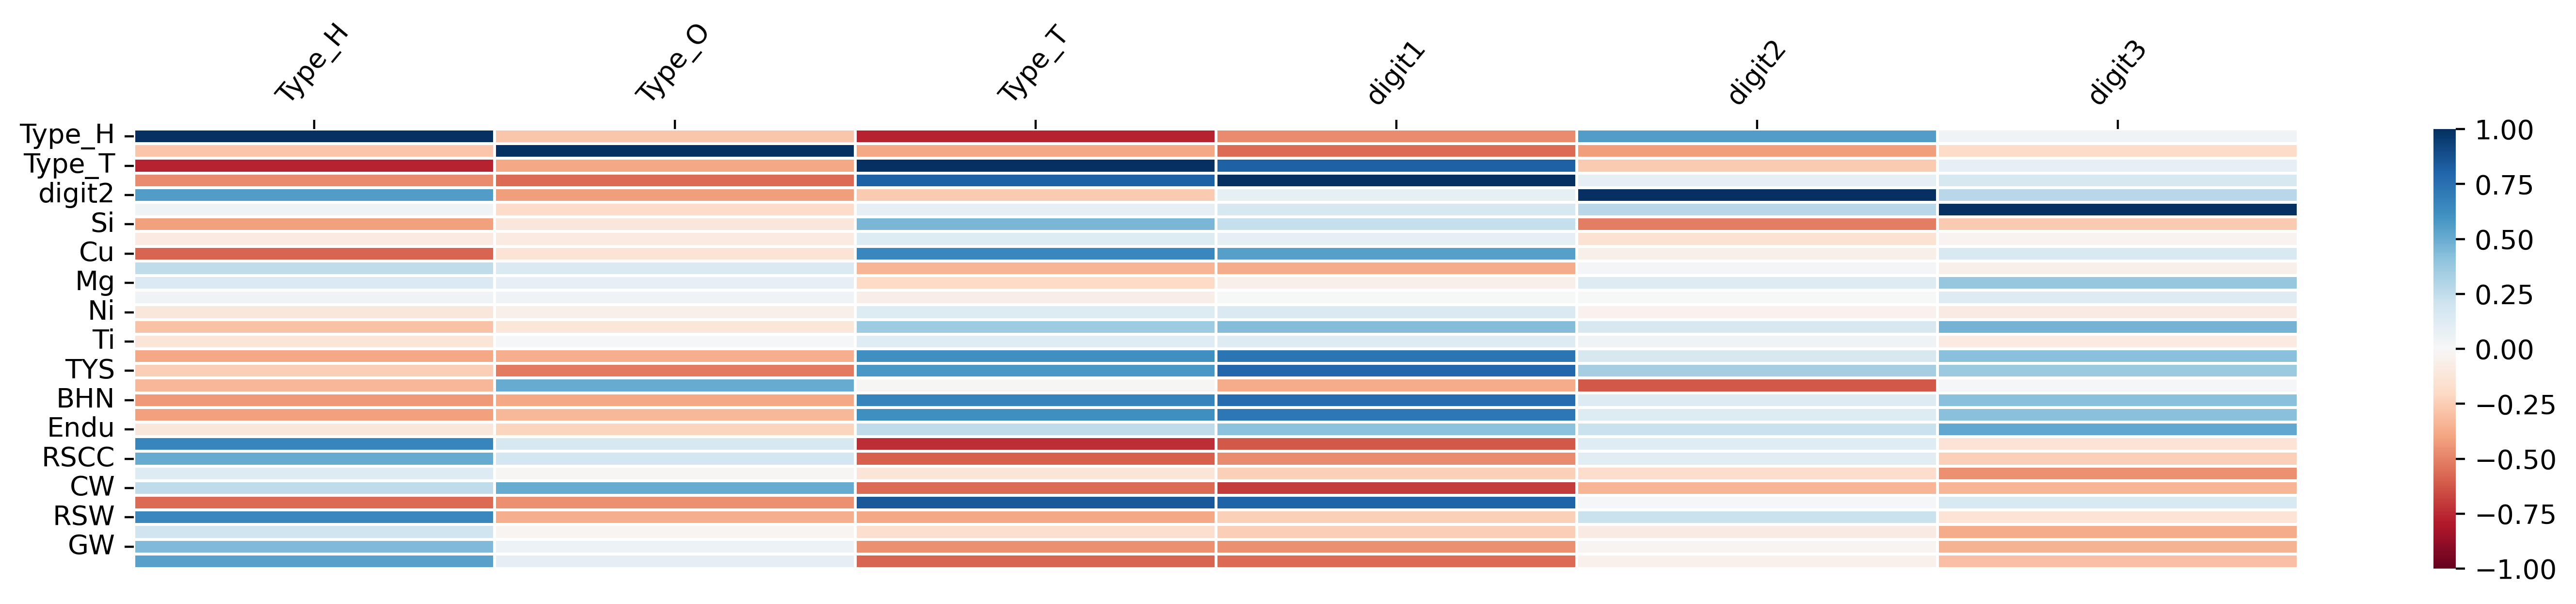

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
# cmap = 'crest'
# cmap = 'magma'
# cmap =  'vlag'
# sns.color_palette("colorblind")
cmap = 'RdBu'
plt.rcParams.update({'font.size': 20})
# sns.set(font_scale=4)
# plt.rcParams['figure.dpi'] = 500

figure(figsize=(18,3), dpi = 400)
# sns.heatmap(Corr_spearman, annot = False, cmap = cmap, mask=Mask)


ax = sns.heatmap(Corr_spearman, annot = False, cmap = cmap, linewidths=0.8, vmin=-1, vmax=1)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.xticks(rotation=50, ha='center')
# plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.show()

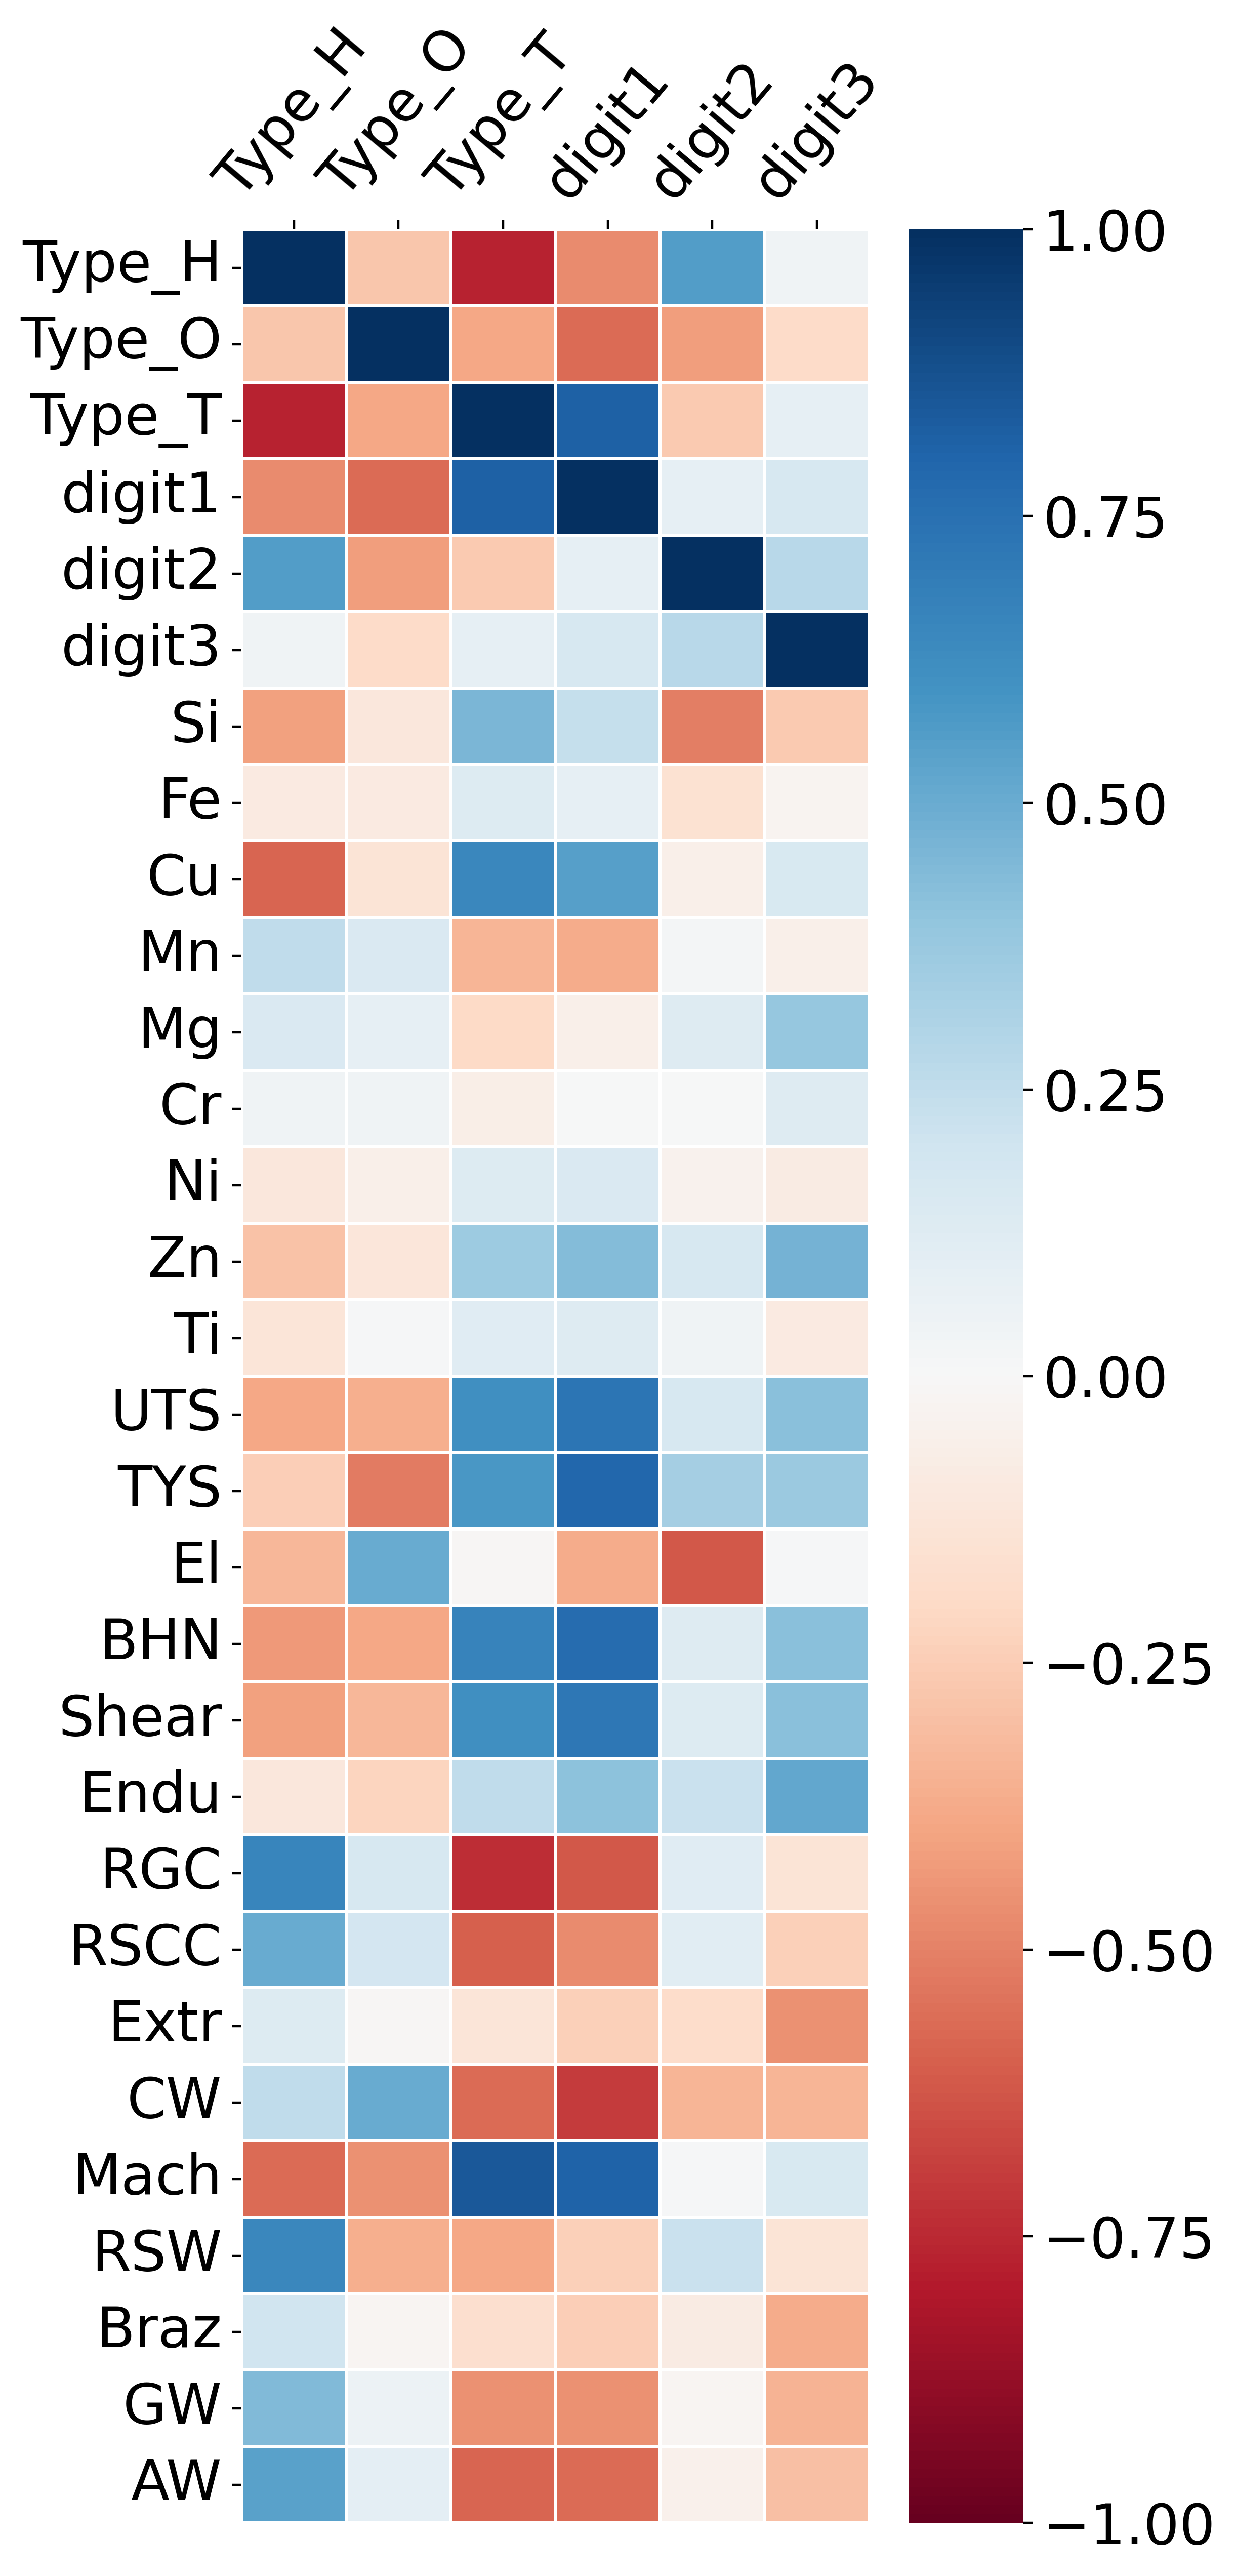

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
# cmap = 'crest'
# cmap = 'magma'
# cmap =  'vlag'
# sns.color_palette("colorblind")
cmap = 'RdBu'
plt.rcParams.update({'font.size': 20})
# sns.set(font_scale=4)
# plt.rcParams['figure.dpi'] = 500

figure(figsize=(5,15), dpi = 400)
# sns.heatmap(Corr_spearman, annot = False, cmap = cmap, mask=Mask)


ax = sns.heatmap(Corr_spearman, annot = False, cmap = cmap, linewidths=0.8, vmin=-1, vmax=1)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.xticks(rotation=50, ha='center')
# plt.xticks(rotation=50, ha='right', rotation_mode='anchor')
plt.show()